In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Configuration du style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Import de la connexion (ajustement du chemin pour le notebook)
sys.path.append(os.path.abspath('../02_Scripts_Python_ETL'))
from connexion_db import get_db_engine

engine = get_db_engine()

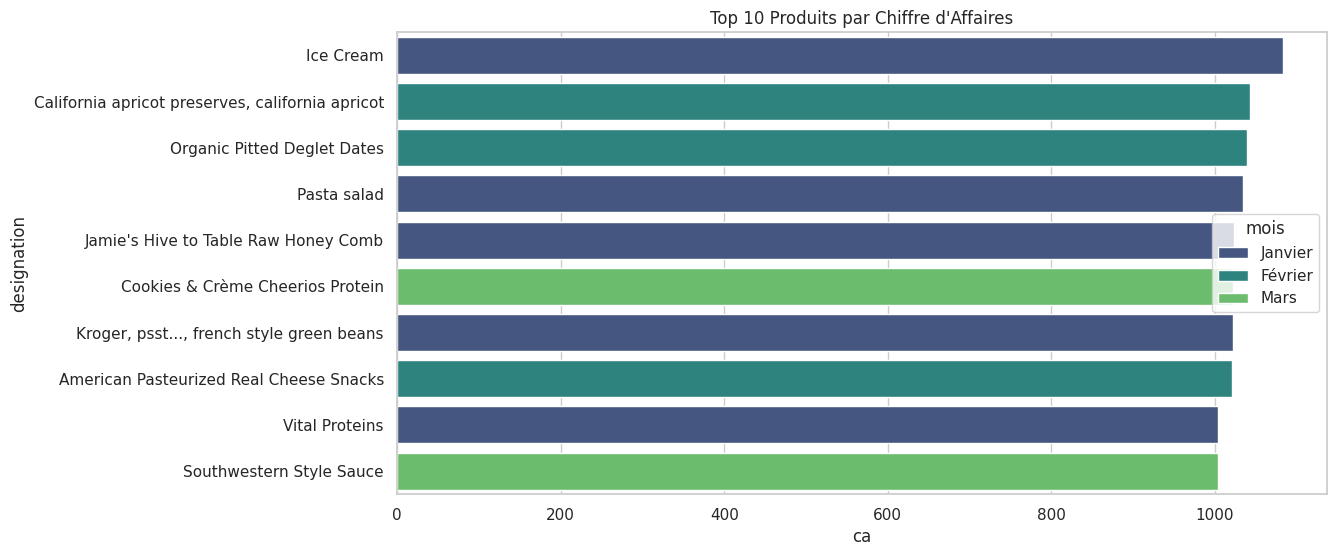

In [5]:
query1 = """
SELECT p.designation, t.mois, SUM(v.montant) as ca
FROM ventes v
JOIN dim_produit p ON v.produit_id = p.produit_id
JOIN dim_temps t ON v.date_id = t.date_id
GROUP BY p.designation, t.mois
ORDER BY ca DESC
LIMIT 10;
"""
df1 = pd.read_sql(query1, engine)

plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='ca', y='designation', hue='mois', palette='viridis')
plt.title("Top 10 Produits par Chiffre d'Affaires")
plt.show()

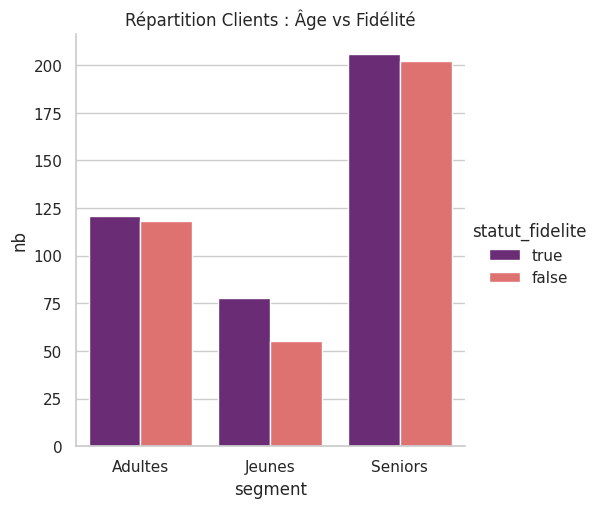

In [12]:
query2 = """
SELECT 
    CASE WHEN age < 30 THEN 'Jeunes' WHEN age < 50 THEN 'Adultes' ELSE 'Seniors' END as segment,
    statut_fidelite, COUNT(*) as nb
FROM dim_client
GROUP BY segment, statut_fidelite;
"""
df2 = pd.read_sql(query2, engine)

sns.catplot(data=df2, kind="bar", x="segment", y="nb", hue="statut_fidelite", palette="magma")
plt.title("Répartition Clients : Âge vs Fidélité")
plt.show()

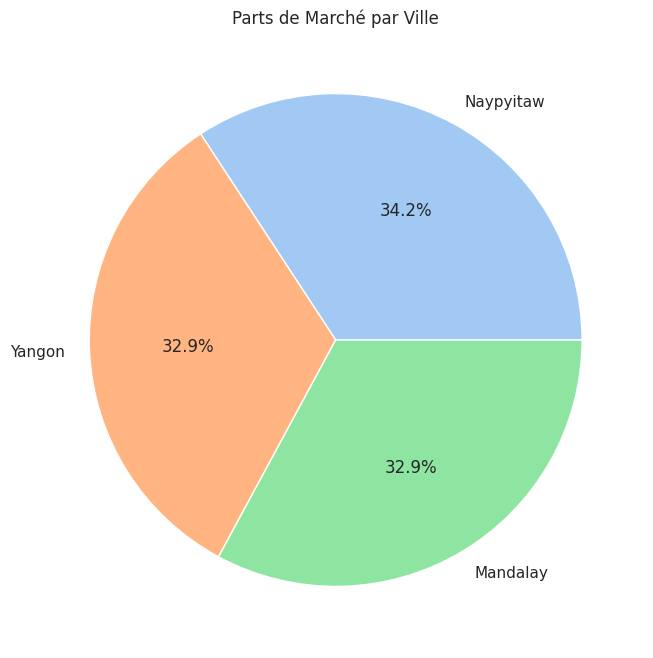

In [7]:
query3 = """
SELECT m.ville, SUM(v.montant) as total_ca
FROM ventes v
JOIN dim_magasin m ON v.id_magasin = m.magasin_id
GROUP BY m.ville
ORDER BY total_ca DESC;
"""
df3 = pd.read_sql(query3, engine)

plt.figure(figsize=(8, 8))
plt.pie(df3['total_ca'], labels=df3['ville'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Parts de Marché par Ville")
plt.show()

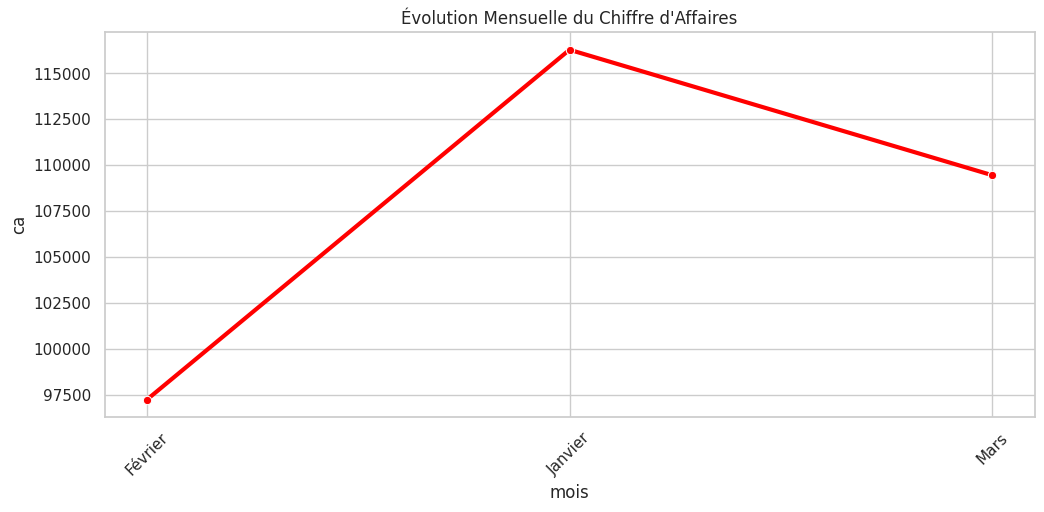

In [8]:
# Note : Il faut s'assurer que dim_temps a une colonne 'jour_semaine' 
# ou calculer à partir de la date
query4 = """
SELECT t.mois, SUM(v.montant) as ca
FROM ventes v
JOIN dim_temps t ON v.date_id = t.date_id
GROUP BY t.mois
ORDER BY t.mois; -- Tri chronologique
"""
df4 = pd.read_sql(query4, engine)

plt.figure(figsize=(12, 5))
sns.lineplot(data=df4, x='mois', y='ca', marker='o', linewidth=3, color='red')
plt.title("Évolution Mensuelle du Chiffre d'Affaires")
plt.xticks(rotation=45)
plt.show()

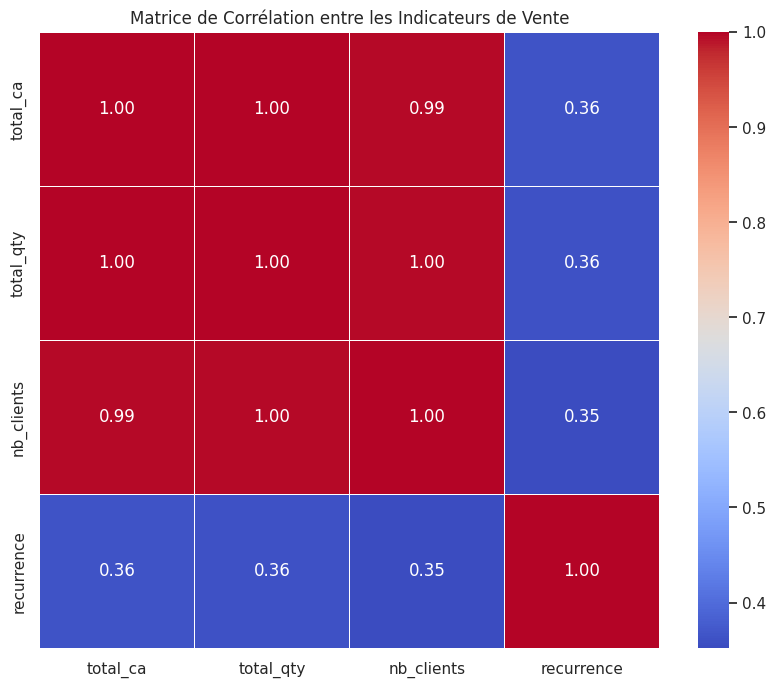

In [ ]:
query = """
SELECT 
    p.categorie,
    SUM(v.montant) as total_ca,
    SUM(v.quantite) as total_qty,
    COUNT(DISTINCT v.client_id) as nb_clients,
    ROUND(CAST(COUNT(v.produit_id) AS DECIMAL) / NULLIF(COUNT(DISTINCT v.client_id), 0), 2) as recurrence
FROM ventes v
JOIN dim_produit p ON v.produit_id = p.produit_id
GROUP BY p.categorie;
"""
df_corr = pd.read_sql(query, engine)

corr_matrix = df_corr[['total_ca', 'total_qty', 'nb_clients', 'recurrence']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation entre les Indicateurs de Vente")
plt.show()